In [42]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def load_shots(file_name=None):
    """Load a `pickle` to a `numpy.ndarray`.

    Parameters
    ----------
    filename: str, optional by default shot_number_#.dat
        The filename to save the data as a `pickle`

    Returns
    -------
    array: `numpy.ndarray`
        The data

    """

    with open(file_name, "rb") as f:
        array = np.asarray(pickle.load(f), dtype=float)
    return array

# Forward modelling

## Example 0: Simple one layer velocity model


In [66]:
# Load the spyro data
rec_ex0_spyro = load_shots(file_name="/Users/yw11823/ACSE/irp/spyro/rec_ex0_shot_record_1.dat")
# Load the Devito data
rec_ex0_devito = np.loadtxt("/Users/yw11823/ACSE/irp/spyro/rec_ex0_devito.dat")[:-1, 1:]

print(rec_ex0_spyro.shape)
print(rec_ex0_devito.shape)

print("Spyro Mean:", np.mean(rec_ex0_spyro))
print("Devito Mean:", np.mean(rec_ex0_devito))

print("Spyro Std Dev:", np.std(rec_ex0_spyro))
print("Devito Std Dev:", np.std(rec_ex0_devito))

print("Spyro Min:", np.min(rec_ex0_spyro))
print("Devito Min:", np.min(rec_ex0_devito))

print("Spyro Max:", np.max(rec_ex0_spyro))
print("Devito Max:", np.max(rec_ex0_devito))

(2000, 100)
(409, 100)
Spyro Mean: 1.8438346889581225e-06
Devito Mean: -0.00028692495783689566
Spyro Std Dev: 0.006104635250614236
Devito Std Dev: 0.3612779343687014
Spyro Min: -0.08667456110462592
Devito Min: -4.967017650604248
Spyro Max: 0.15557308239283232
Devito Max: 9.863343238830566


In [81]:
rec_ex0_devito[:, 0].shape

(409,)

In [101]:
# Load the spyro data
src_spyro = np.loadtxt("/Users/yw11823/ACSE/irp/spyro/src_spyro.dat")
# Load the Devito data
src_devito = np.loadtxt("/Users/yw11823/ACSE/irp/spyro/src_devito.dat")


In [102]:
print(src_devito.shape)
print(src_spyro.shape)

(410,)
(2000,)


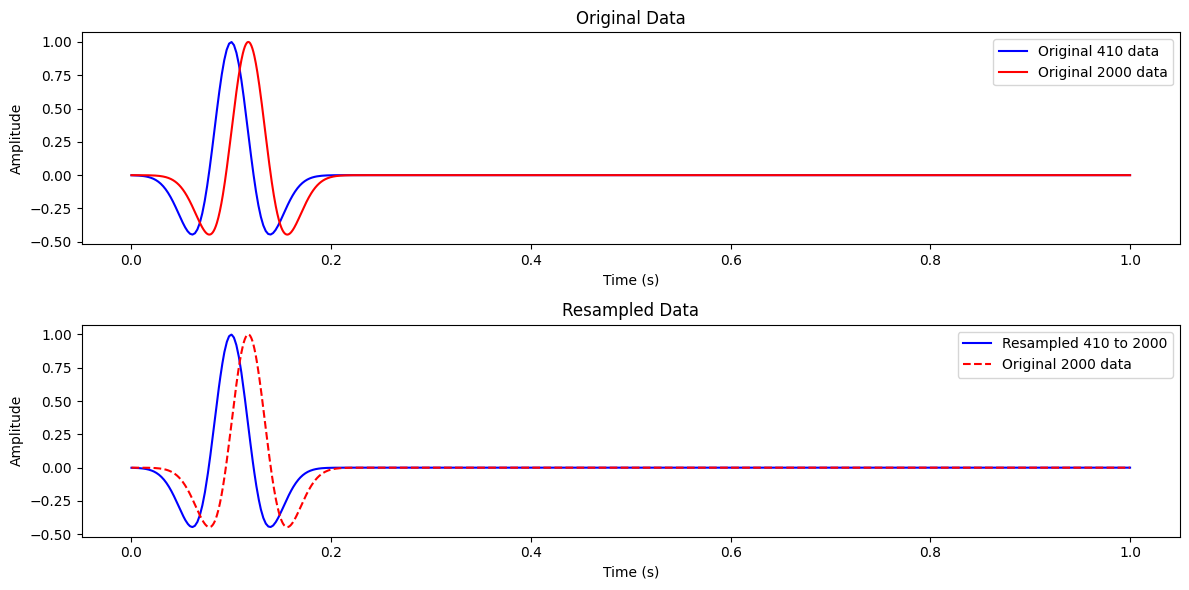

Mean Squared Error (410 resampled to 2000): 0.036650264840129836
Mean Squared Error (2000 resampled to 410): 0.03669412778971492


In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
data_410 = src_devito
data_2000 = src_spyro

# 时间轴
time_410 = np.linspace(0, 1, src_devito.shape[0])
time_2000 = np.linspace(0, 1, src_spyro.shape[0])

# 创建插值函数
interp_func_410_to_2000 = interp1d(time_410, data_410, kind='linear', fill_value="extrapolate")
interp_func_2000_to_410 = interp1d(time_2000, data_2000, kind='linear', fill_value="extrapolate")

# 将410个数据点插值到2000个数据点的时间轴上
data_410_resampled = interp_func_410_to_2000(time_2000)

# 将2000个数据点插值到410个数据点的时间轴上
data_2000_resampled = interp_func_2000_to_410(time_410)

# 绘制原始数据和插值后的数据
plt.figure(figsize=(12, 6))

# 绘制原始数据
plt.subplot(2, 1, 1)
plt.plot(time_410, data_410, label='Original 410 data', color='blue')
plt.plot(time_2000, data_2000, label='Original 2000 data', color='red')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Data')

# 绘制插值后的数据
plt.subplot(2, 1, 2)
plt.plot(time_2000, data_410_resampled, label='Resampled 410 to 2000', color='blue')
plt.plot(time_2000, data_2000, label='Original 2000 data', color='red', linestyle='dashed')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Resampled Data')

plt.tight_layout()
plt.show()

# 计算均方误差（MSE）
mse_410_to_2000 = np.mean((data_410_resampled - data_2000)**2)
mse_2000_to_410 = np.mean((data_2000_resampled - data_410)**2)

print(f"Mean Squared Error (410 resampled to 2000): {mse_410_to_2000}")
print(f"Mean Squared Error (2000 resampled to 410): {mse_2000_to_410}")

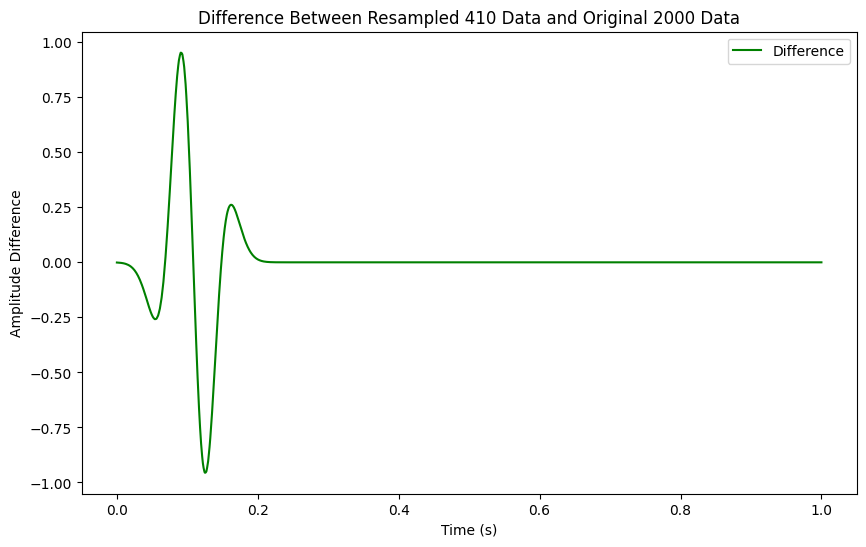

In [104]:
# 计算差异
difference = data_410_resampled - data_2000

# 绘制差异
plt.figure(figsize=(10, 6))
plt.plot(time_2000, difference, label='Difference', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude Difference')
plt.title('Difference Between Resampled 410 Data and Original 2000 Data')
plt.legend()
plt.show()


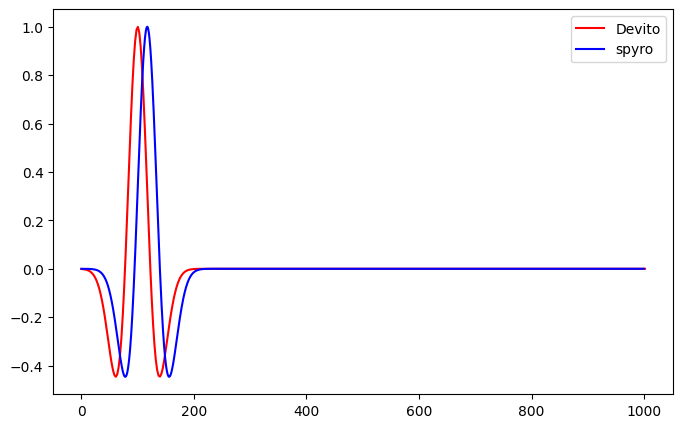

In [94]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(src_devito.shape[0]) * 2.449, src_devito, color='red', linewidth=1.5, label ="Devito" )
plt.plot(np.arange(src_spyro.shape[0]) * 0.5, src_spyro, color='blue', linewidth=1.5, label = "spyro" )
plt.legend()
plt.show()

In [96]:
np.arange(src_spyro.shape[0]) * 0.5

array([0.000e+00, 5.000e-01, 1.000e+00, ..., 9.985e+02, 9.990e+02,
       9.995e+02])

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(src_devito.shape[0]) * 2.449, src_devito - src_spyro, color='red', linewidth=1.5, label ="Devito" )
plt.legend()
plt.show()

In [ ]:
# Plot trace at receiver 0
plt.figure(figsize=(10,4))
plt.plot( np.arange(src_devito[0]) * 2.449, src_devito[:, 0], label='Devito', color='red')
plt.plot( np.arange(src_spyro[0]) * 0.5, src_spyro[:, 0], label='spyro', color='blue')
plt.xlabel('time (ms)')
plt.ylabel('amplitude')
plt.legend()

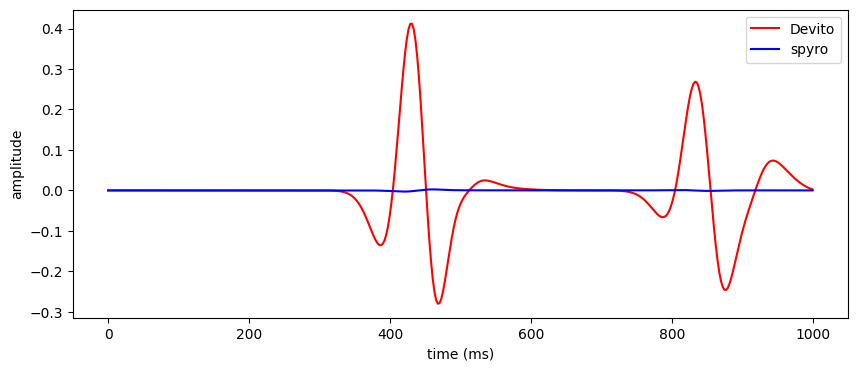

In [80]:
# Plot trace at receiver 0
plt.figure(figsize=(10,4))
plt.plot( np.arange(rec_ex0_devito.shape[0]) * 2.449, rec_ex0_devito[:, 0], label='Devito', color='red')
plt.plot( np.arange(rec_ex0_spyro.shape[0]) * 0.5, rec_ex0_spyro[:, 0], label='spyro', color='blue')
plt.xlabel('time (ms)')
plt.ylabel('amplitude')
plt.legend()

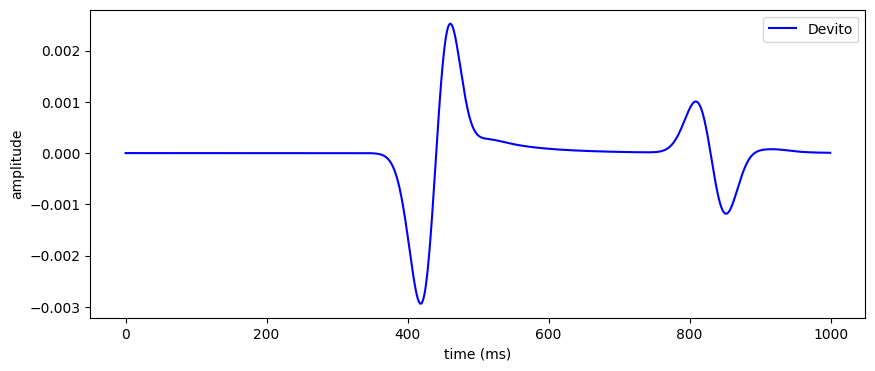

In [73]:
# Plot trace at receiver 0
plt.figure(figsize=(10,4))
plt.plot( np.arange(rec_ex0_spyro.shape[0]) * 0.5, rec_ex0_spyro[:, 0], label='Devito', color='blue')
plt.xlabel('time (ms)')
plt.ylabel('amplitude')
plt.legend()

## Example 1 : Simple Circle with one source


## Comparision between pressure fields

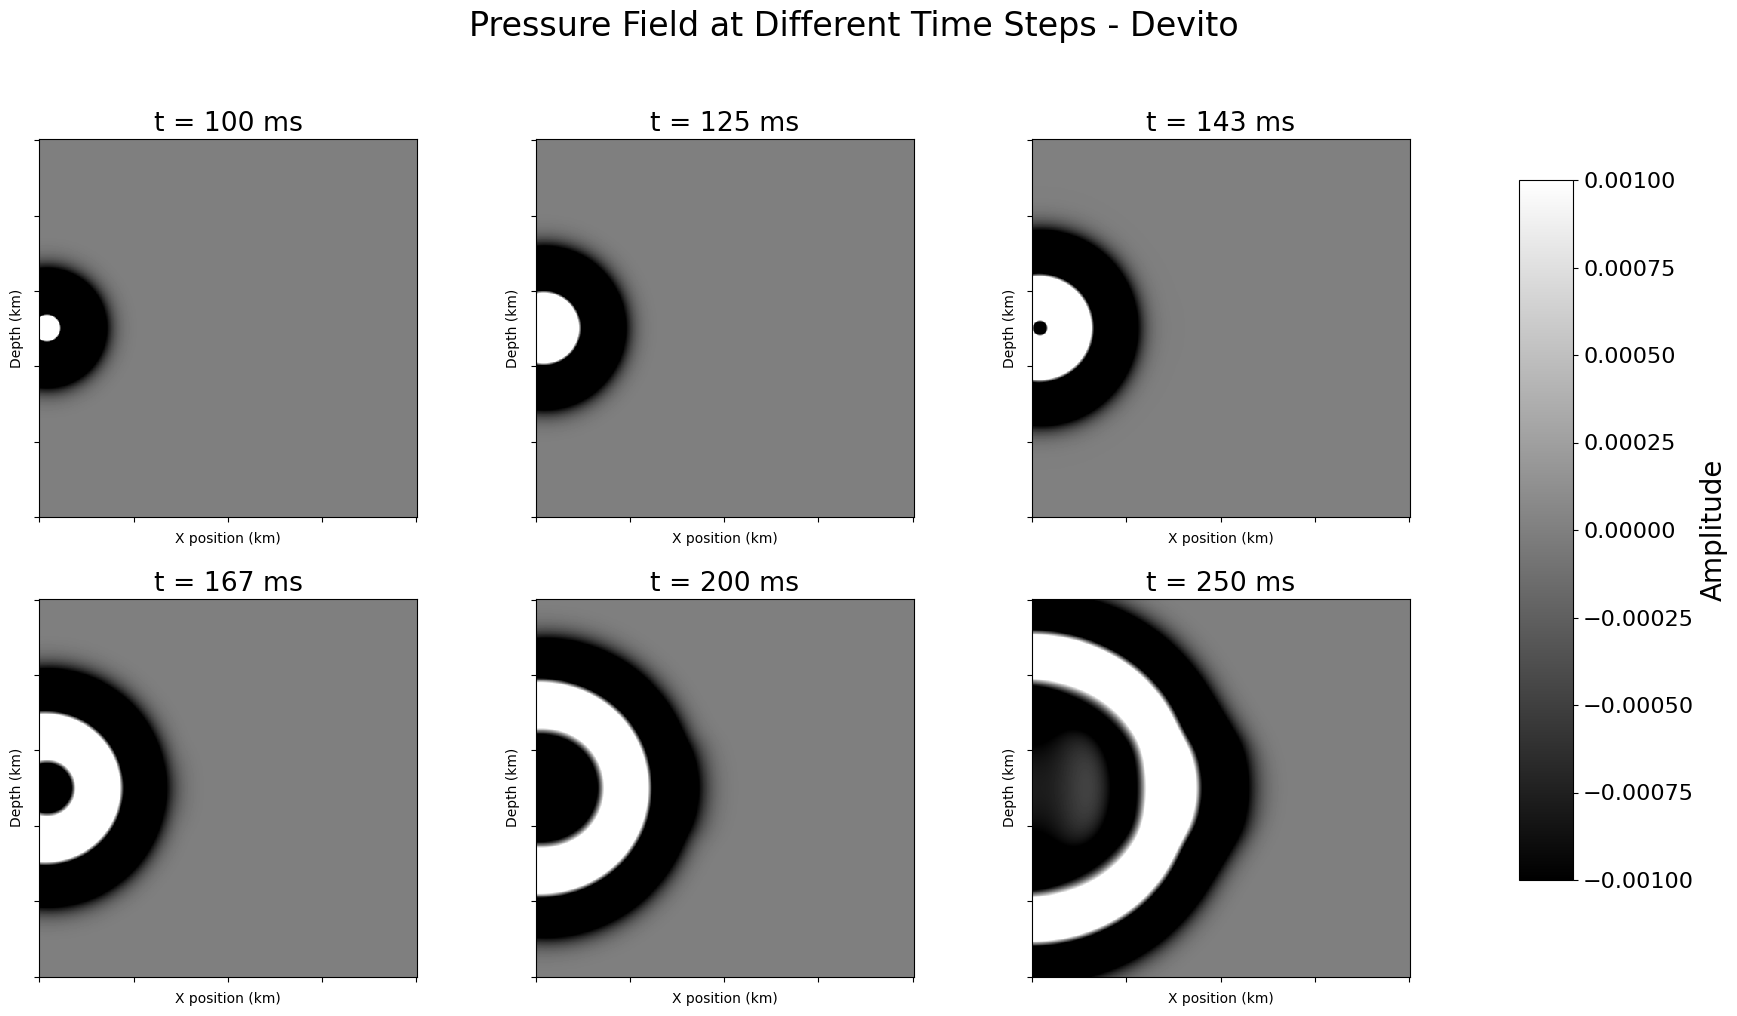

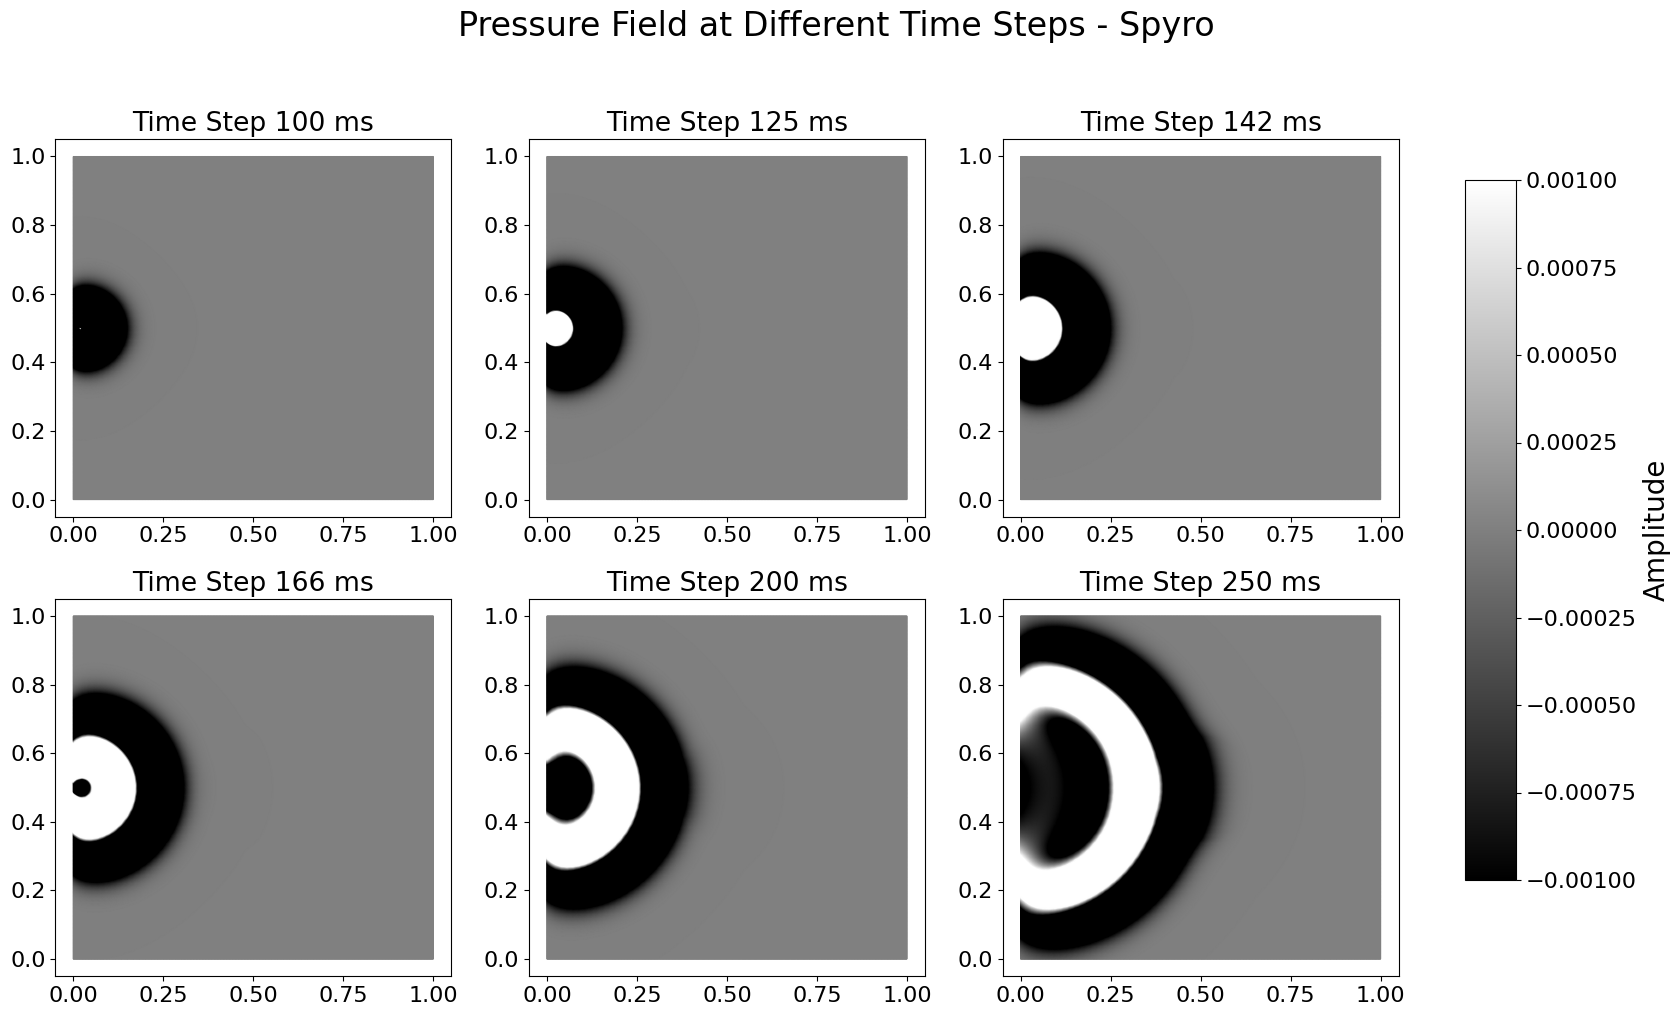

## Comparison between shot record

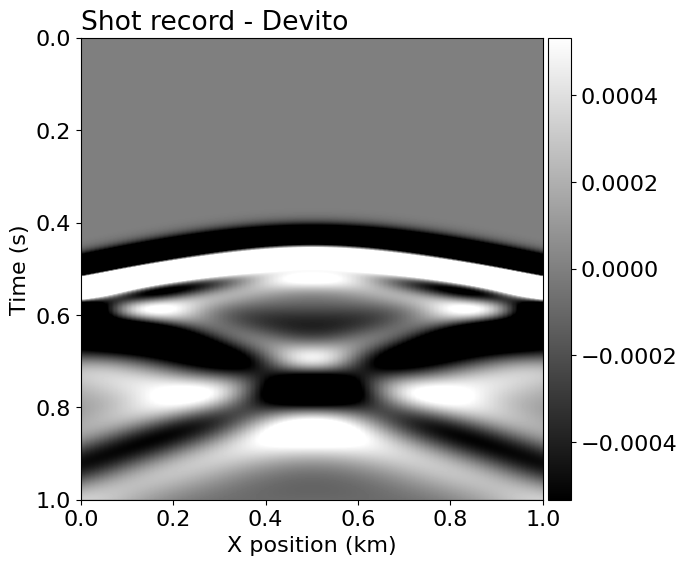
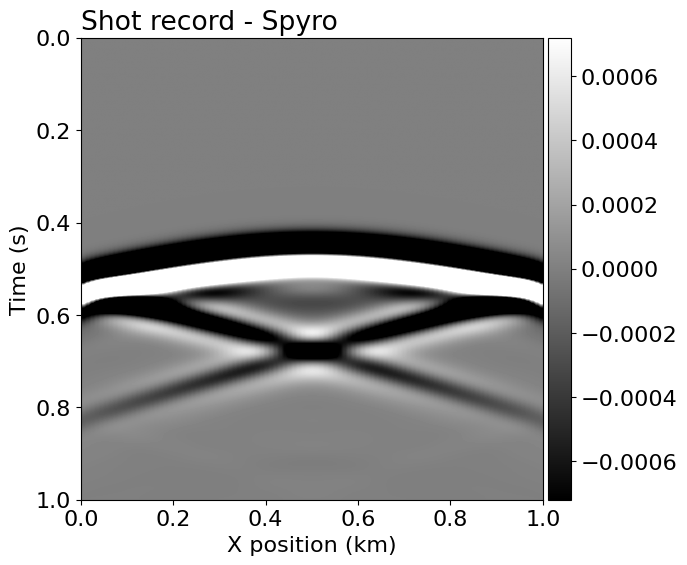

### Load the data of shot records to compare
### 1. Numerical comparison
Both Spyro and Devito have mean values close to zero, indicating no significant bias.\
Spyro has a slightly higher standard deviation, indicating more variability. \
Devito shows a higher peak amplitude compared to Spyro.


In [55]:
# Load the spyro data
rec_ex1_spyro = load_shots(file_name="/Users/yw11823/ACSE/irp/spyro/rec_ex1_shot_record_1.dat")
# Load the Devito data
rec_ex1_devito = np.loadtxt("/Users/yw11823/ACSE/irp/spyro/rec_ex1_devito.dat")

print(rec_ex1_spyro.shape)
print(rec_ex1_devito.shape)

print("Spyro Mean:", np.mean(rec_ex1_spyro))
print("Devito Mean:", np.mean(rec_ex1_devito))

print("Spyro Std Dev:", np.std(rec_ex1_spyro))
print("Devito Std Dev:", np.std(rec_ex1_devito))

print("Spyro Min:", np.min(rec_ex1_spyro))
print("Devito Min:", np.min(rec_ex1_devito))

print("Spyro Max:", np.max(rec_ex1_spyro))
print("Devito Max:", np.max(rec_ex1_devito))

(2450, 101)
(2450, 101)
Spyro Mean: -4.694002549904476e-07
Devito Mean: 7.447121404801464e-07
Spyro Std Dev: 0.0010044136740559562
Devito Std Dev: 0.0007243652515088982
Spyro Min: -0.003681863249388824
Devito Min: -0.0026107551530003548
Spyro Max: 0.0071767811593709445
Devito Max: 0.005332414526492357


### 2.1 Draw a waveform graph
Both Spyro and Devito produce similar shot records with visible amplitude peaks and troughs. \
Any differences in amplitude could be due to numerical differences or slight differences in implementation.

In [56]:
# Number of time steps
nt = 2451
# Time axis
dt = 0.4082
t0 = 0.
tn = dt * (nt-1)
time = np.linspace(t0, tn, nt)
print("t0, tn, dt, nt; %.4f %.4f %.4f %d" % (t0, tn, dt, nt))

t0, tn, dt, nt; 0.0000 1000.0900 0.4082 2451


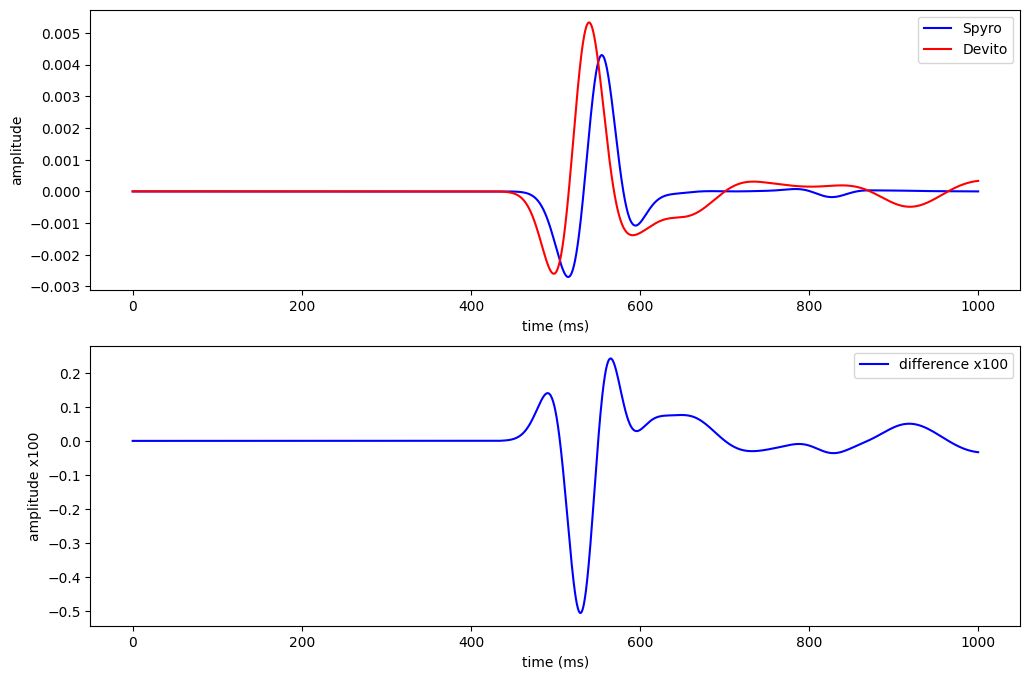

In [45]:
import matplotlib.pyplot as plt

time_steps = np.arange(rec_ex1_spyro.shape[0]) 

# Plot trace
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(time_steps * 0.4082, rec_ex1_spyro[:, 0], label='Spyro', color='blue')
plt.plot(time_steps * 0.4082, rec_ex1_devito[:, 0], label='Devito', color='red')
plt.xlabel('time (ms)')
plt.ylabel('amplitude')
plt.legend()

plt.subplot(2,1,2)
plt.plot(time_steps * 0.4082, 100 * (rec_ex1_spyro[:, 0] - rec_ex1_devito[:, 0]), '-b', label='difference x100')
plt.xlabel('time (ms)')
plt.ylabel('amplitude x100')
plt.legend()
plt.savefig('ref.pdf')
plt.show()

In [46]:
nt = rec_ex1_spyro.shape[0]
error_time = np.zeros(1)
error_time[0] = np.linalg.norm(rec_ex1_spyro[:-1, 0] - rec_ex1_devito[:-1, 0], 2) / np.sqrt(nt)
errors_plot = [(time_steps, rec_ex1_spyro[:-1, 0] - rec_ex1_devito[:-1, 0])]
print("Error:", error_time[0])


Error: 0.0008608123326128478


### 2.2 Draw a difference shot record graph
The differences between Spyro and Devito shot records are concentrated in certain areas. \
This suggests that while the overall wave propagation is similar, specific regions have discrepancies due to different numerical methods.

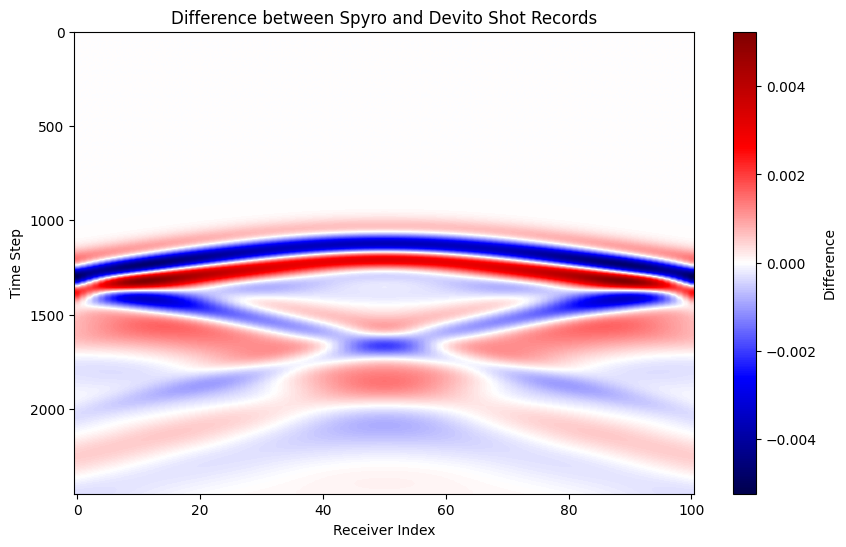

In [47]:
difference = rec_ex1_spyro - rec_ex1_devito

plt.figure(figsize=(10, 6))
plt.imshow(difference, aspect='auto', cmap='seismic', vmin=-np.max(np.abs(difference)), vmax=np.max(np.abs(difference)))
plt.colorbar(label='Difference')
plt.title('Difference between Spyro and Devito Shot Records')
plt.xlabel('Receiver Index')
plt.ylabel('Time Step')
plt.show()


### 3. Spectral Analysis
Both Spyro and Devito capture the same dominant frequencies, indicating similar wave phenomena. \
Devito has higher frequency amplitudes, possibly due to different numerical damping or resolution.

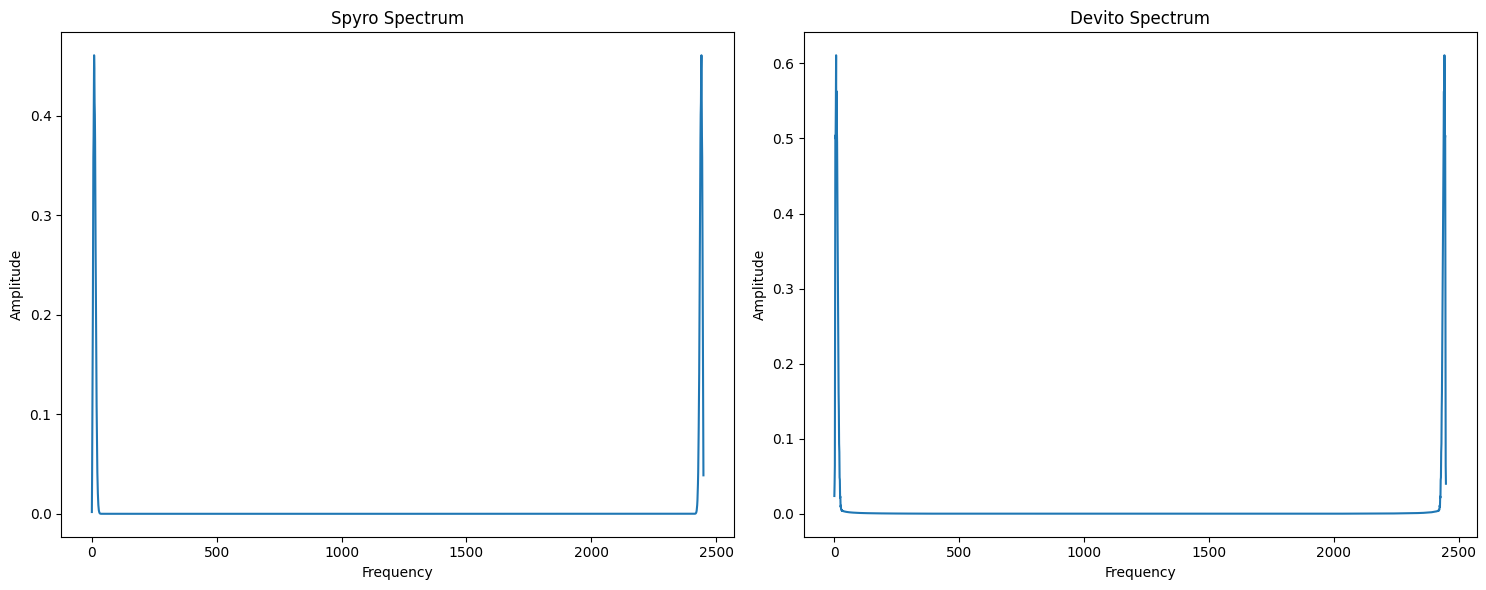

In [48]:
spyro_spectrum = np.fft.fft(rec_ex1_spyro, axis=0)
devito_spectrum = np.fft.fft(rec_ex1_devito, axis=0)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(np.abs(spyro_spectrum[:, 0]), label='Spyro')
plt.title('Spyro Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(np.abs(devito_spectrum[:, 0]), label='Devito')
plt.title('Devito Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


### 4. Correlation Analysis
A correlation of approximately 0.471 indicates a moderate positive relationship between the data from Spyro and Devito. This means that as the values from one software increase, the values from the other software also tend to increase, but not perfectly. This suggests that the results from both software have some similarities but also noticeable differences.

In [49]:
correlation = np.corrcoef(rec_ex1_spyro.flatten(), rec_ex1_devito.flatten())[0, 1]
print("Correlation between Spyro and Devito data:", correlation)

Correlation between Spyro and Devito data: 0.4713996942387175


# Example 2: Marmousi model 2D --- Ongoing

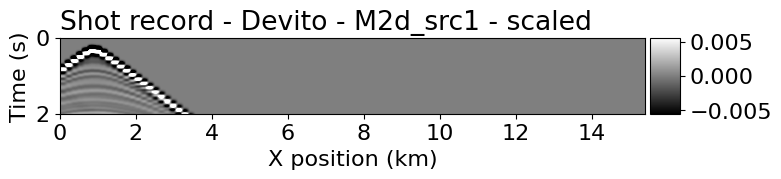
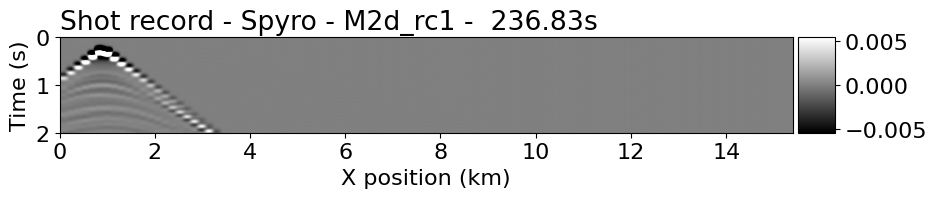

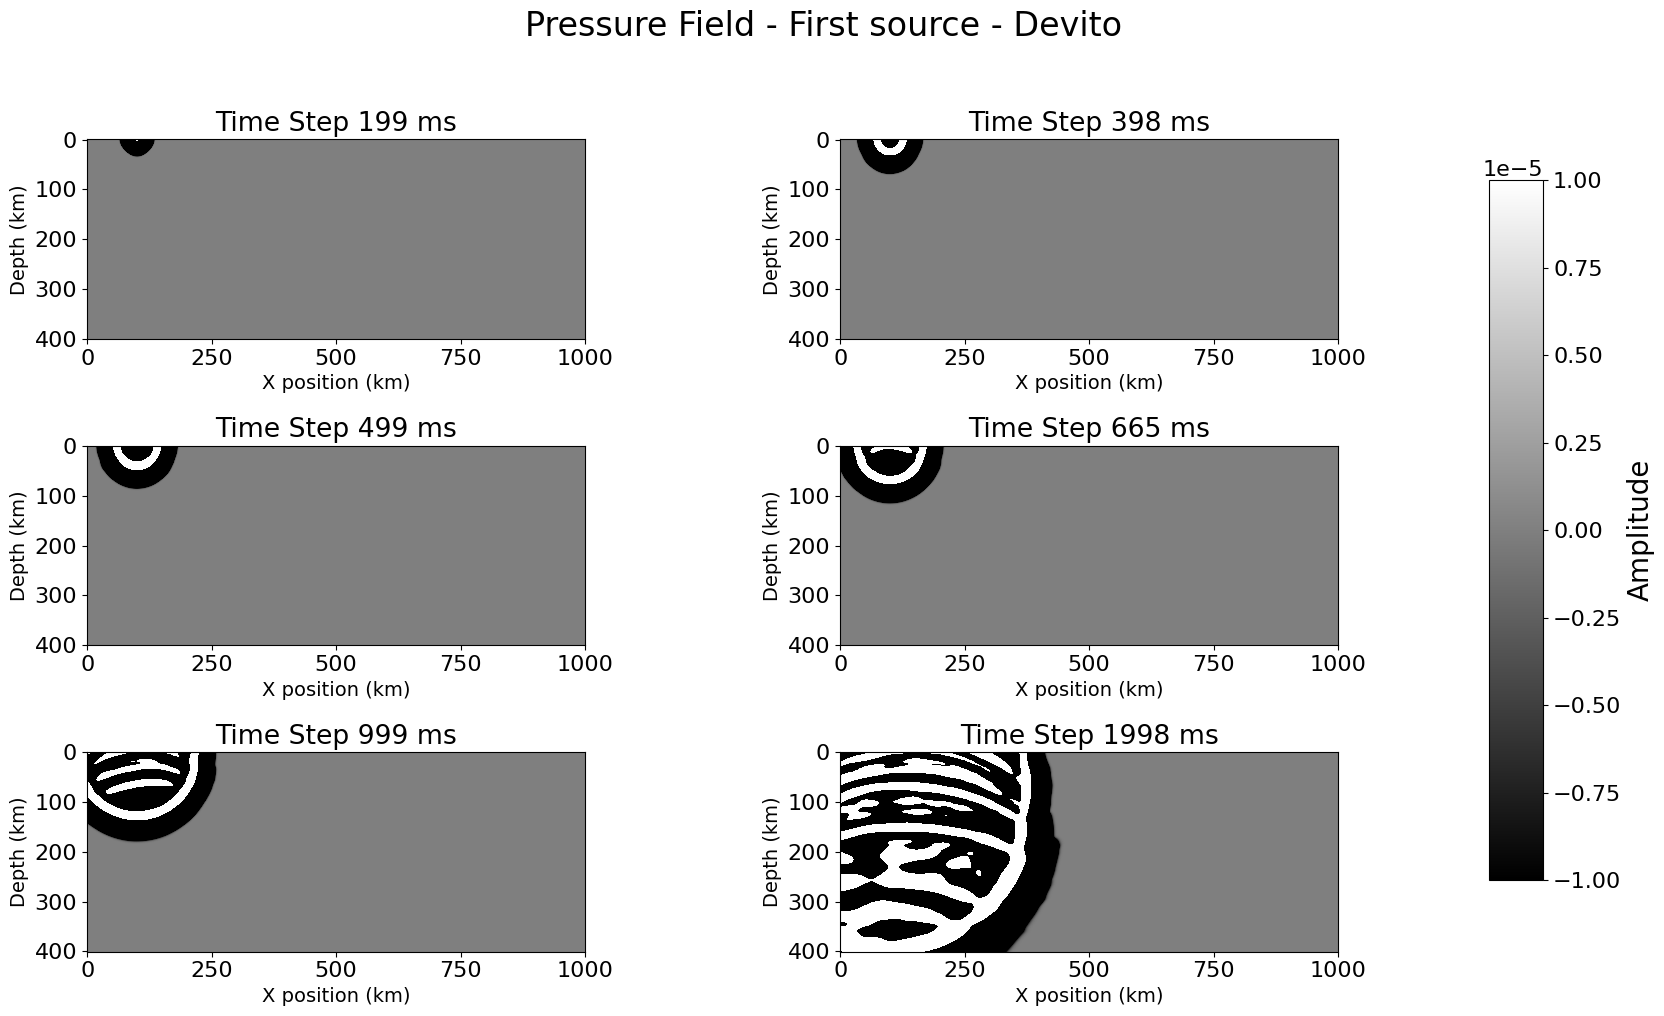
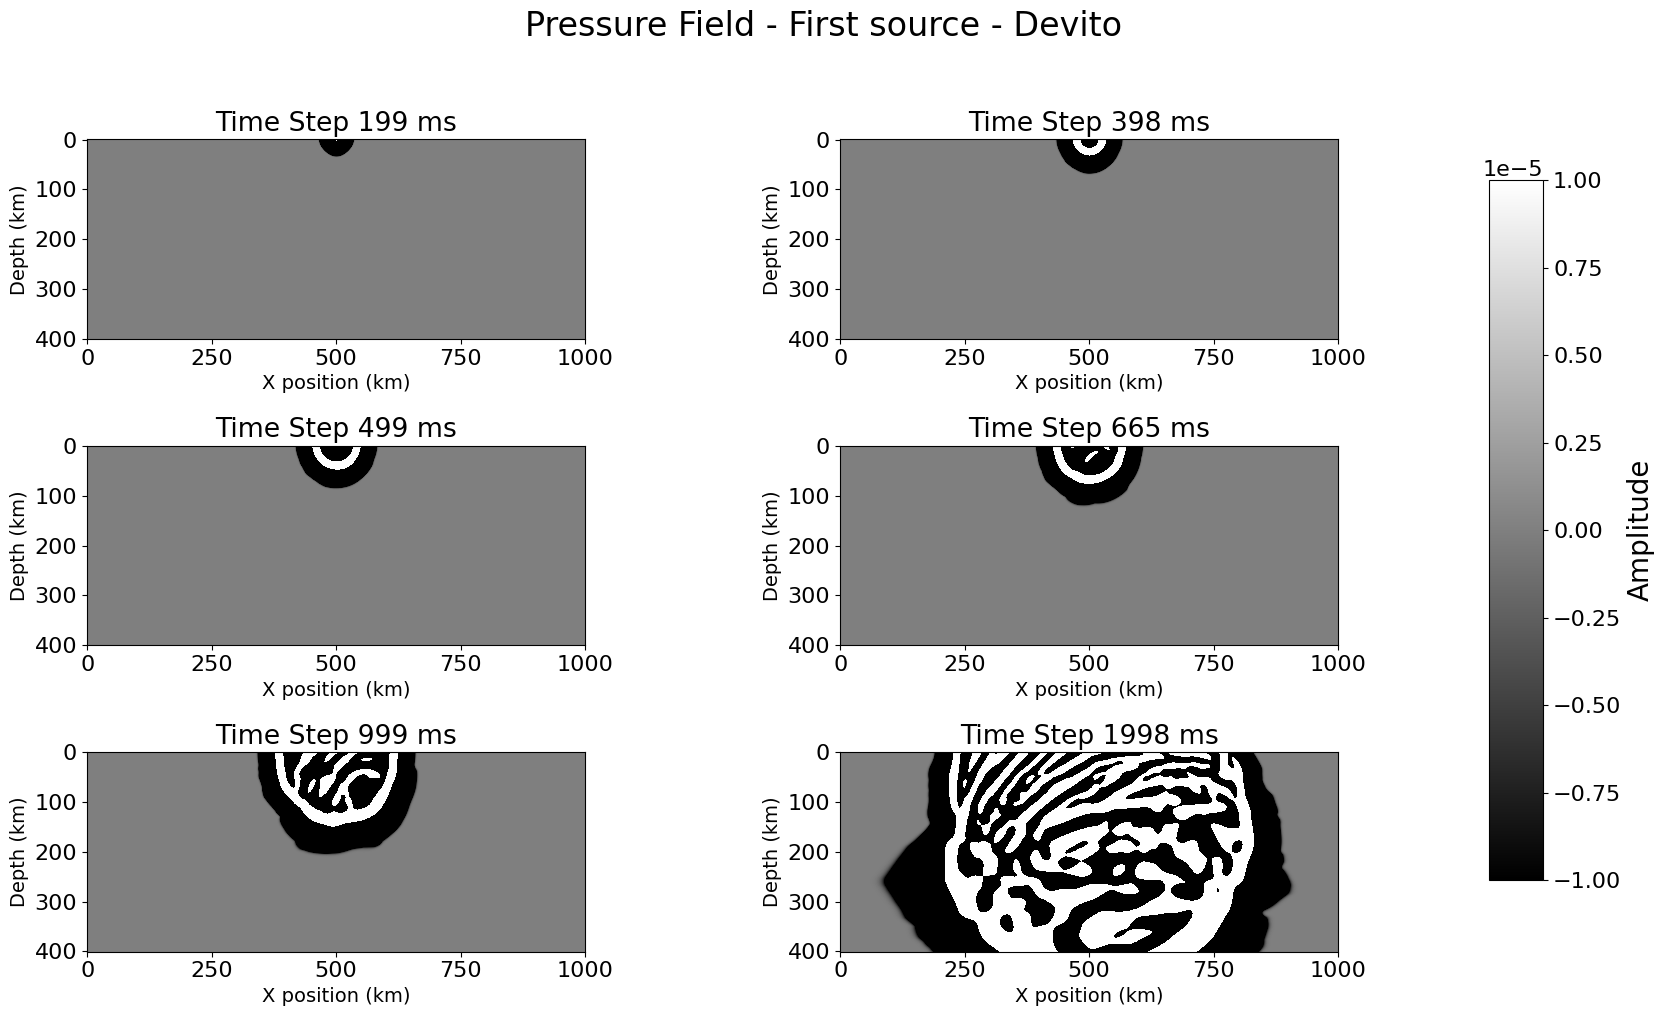
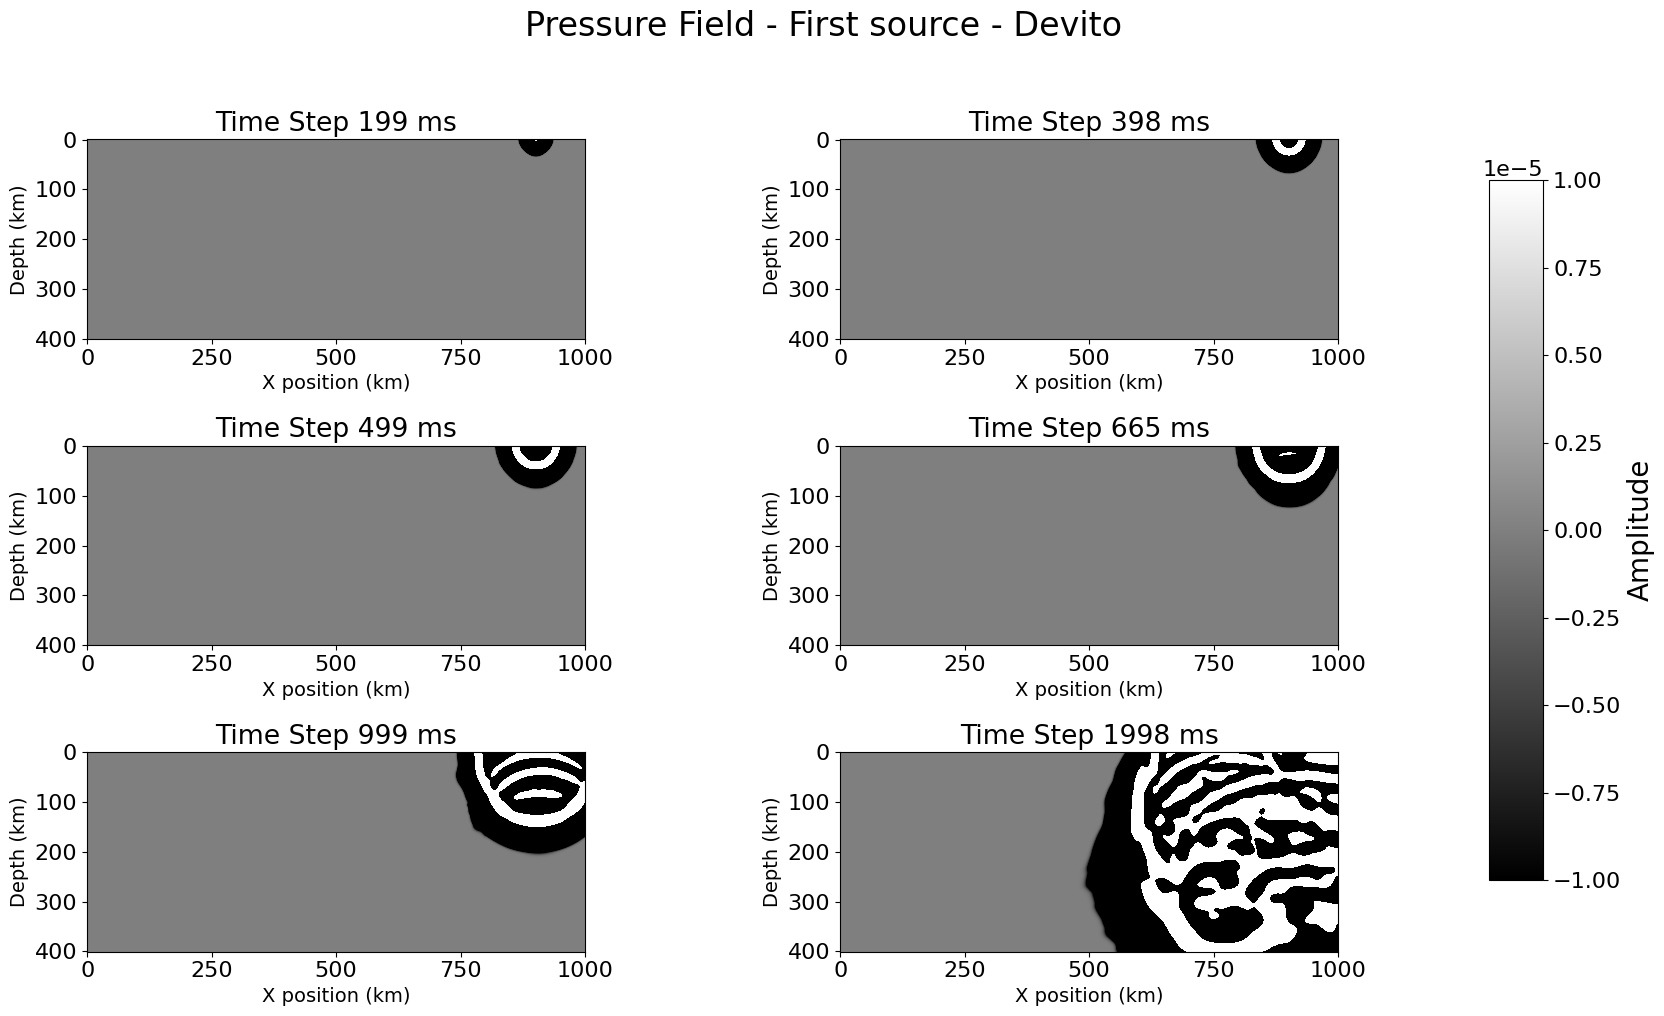
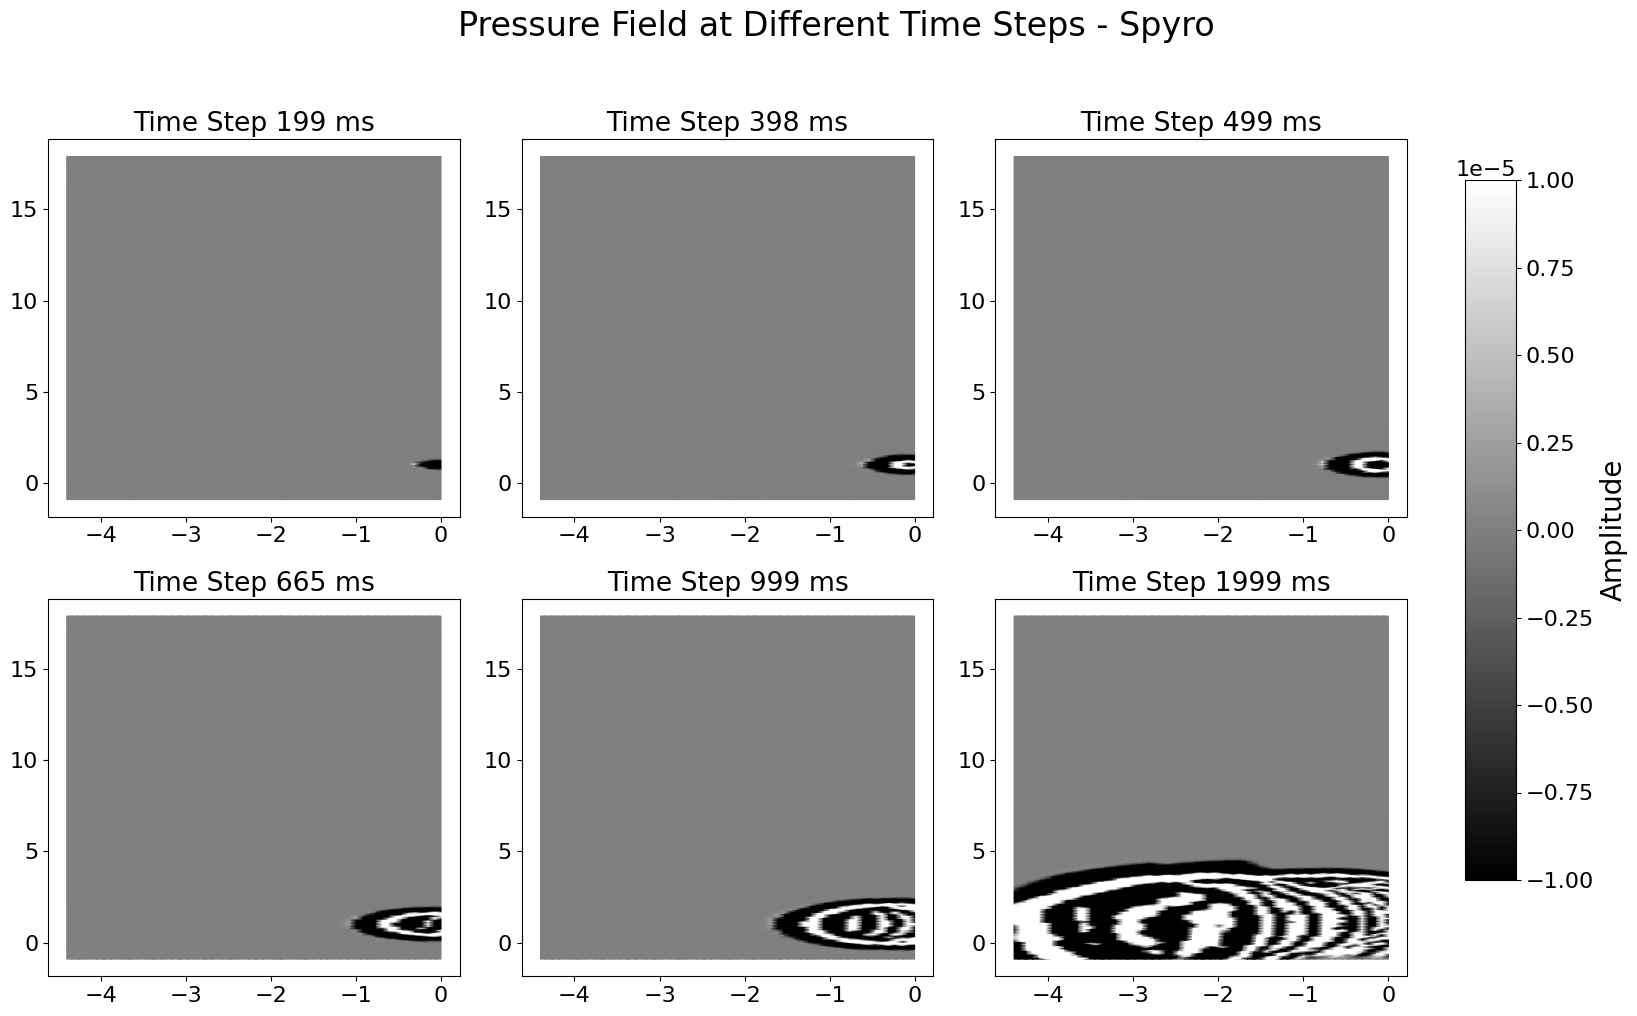

### Load the data of shot records to compare
### 1. Numerical comparison

In [23]:
# Load the spyro data
rec_ex2_spyro = load_shots(file_name="/Users/yw11823/ACSE/irp/spyro/paper/M2d_true_shot_record_1.dat")
# rec_ex2_spyro = load_shots(file_name="/Users/yw11823/ACSE/irp/spyro/M2d_true_shot_record_1.dat")
rec_ex2_spyro_reduced = rec_ex2_spyro[::10, :]
# Load the Devito data
rec_ex2_devito = np.loadtxt("/Users/yw11823/ACSE/irp/spyro/M2d_shotrecord_src1_devito.dat")
rec_ex2_devito_modif = rec_ex2_devito * 0.01

# print(rec_ex2_spyro.shape)
print("data spyro shape:", rec_ex2_spyro.shape)
print("data spyro reduced shape:", rec_ex2_spyro_reduced.shape)
print("data Devito shape", rec_ex2_devito.shape)

print("Spyro Mean:", np.mean(rec_ex2_spyro_reduced))
print("Devito Mean:", np.mean(rec_ex2_devito))

print("Spyro Std Dev:", np.std(rec_ex2_spyro_reduced))
print("Devito Std Dev:", np.std(rec_ex2_devito))

print("Spyro Min:", np.min(rec_ex2_spyro_reduced))
print("Devito Min:", np.min(rec_ex2_devito))

print("Spyro Max:", np.max(rec_ex2_spyro_reduced))
print("Devito Max:", np.max(rec_ex2_devito))

data spyro shape: (16950, 101)
data spyro reduced shape: (1695, 101)
data Devito shape (1695, 101)
Spyro Mean: 2.9207945171631485e-08
Devito Mean: -6.218348150145317e-07
Spyro Std Dev: 0.003455532167671752
Devito Std Dev: 0.0026359961110497035
Spyro Min: -0.10159142382156737
Devito Min: -0.03285946696996689
Spyro Max: 0.17833142480069591
Devito Max: 0.05564961954951286


In [27]:
rec_ex2_spyro

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.21235621e-04, -1.99163113e-04, -2.57965150e-05, ...,
        -1.33140995e-14,  5.75005265e-15,  2.82296375e-15],
       [-1.21409992e-04, -1.98311194e-04, -2.52874269e-05, ...,
        -1.33126699e-14,  5.89129536e-15,  2.76011955e-15],
       [-1.21582658e-04, -1.97456581e-04, -2.47831438e-05, ...,
        -1.33008428e-14,  6.02925057e-15,  2.69477272e-15]])

In [28]:
rec_ex2_devito

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-8.52663870e-05,  1.37348578e-03,  1.89794914e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.64377361e-05,  1.43019424e-03,  1.89464504e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.43647402e-05,  1.48424471e-03,  1.88775267e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

### 2.1 Draw a waveform graph

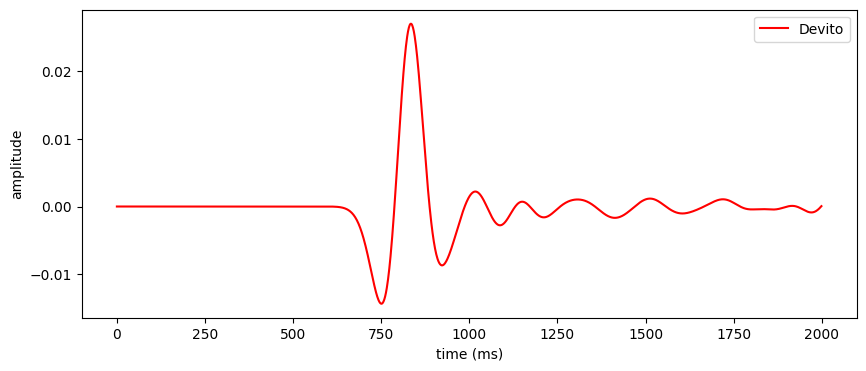

In [24]:
# Plot trace at receiver 0
plt.figure(figsize=(10,4))
plt.plot( np.arange(rec_ex2_devito.shape[0]) * 1.18, rec_ex2_devito[:, 0], label='Devito', color='red')
plt.xlabel('time (ms)')
plt.ylabel('amplitude')
plt.legend()

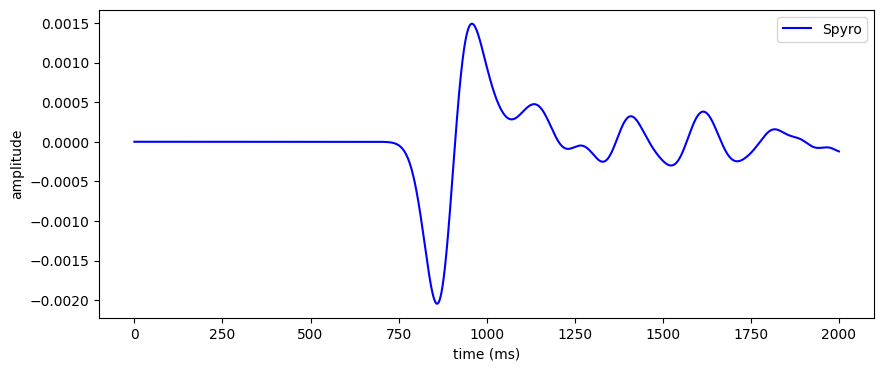

In [26]:
import matplotlib.pyplot as plt
# Plot trace
plt.figure(figsize=(10,4))
plt.plot( np.arange(rec_ex2_spyro.shape[0]) * 0.118, rec_ex2_spyro[:, 0], label='Spyro', color='blue')
plt.xlabel('time (ms)')
plt.ylabel('amplitude')
plt.legend()

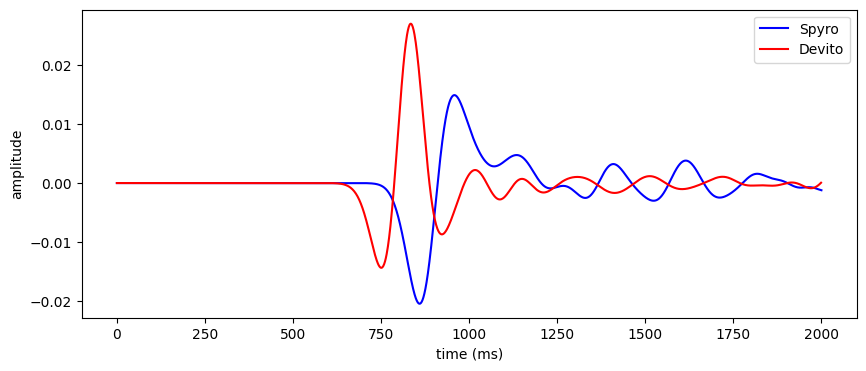

In [75]:
# Plot trace
plt.figure(figsize=(10,4))
plt.plot( np.arange(rec_ex2_spyro.shape[0]) * 0.118, rec_ex2_spyro[:, 0] * 10, label='Spyro', color='blue')
plt.plot( np.arange(rec_ex2_devito.shape[0]) * 1.18, rec_ex2_devito[:, 0], label='Devito', color='red')
plt.xlabel('time (ms)')
plt.ylabel('amplitude')
plt.legend()


In [37]:
nt = rec_ex2_spyro_reduced.shape[0]
time_steps = np.arange(rec_ex2_spyro.shape[0]) * 0.118
error_time = np.zeros(1)
error_time[0] = np.linalg.norm(rec_ex2_spyro_reduced[:-1, 0] - rec_ex2_devito[:-1, 0], 2) / np.sqrt(nt)
errors_plot = [(time_steps, rec_ex2_spyro_reduced[:-1, 0] - rec_ex2_devito[:-1, 0])]
print("Error:", error_time[0])

Error: 0.005210238147899678


### 2.2 Draw a difference shot record graph
The differences between Spyro and Devito shot records are concentrated in certain areas. \
This suggests that while the overall wave propagation is similar, specific regions have discrepancies due to different numerical methods.

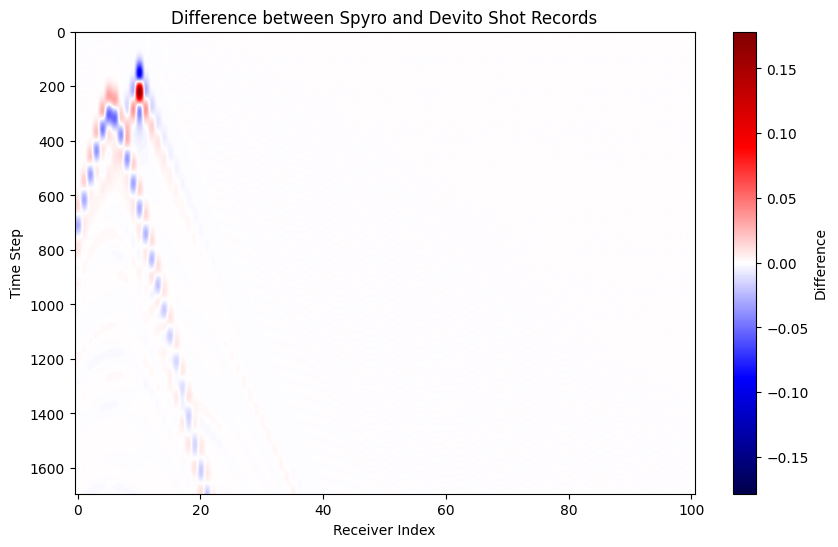

In [35]:
difference = rec_ex2_spyro_reduced - rec_ex2_devito

plt.figure(figsize=(10, 6))
plt.imshow(difference, aspect='auto', cmap='seismic', vmin=-np.max(np.abs(difference)), vmax=np.max(np.abs(difference)))
plt.colorbar(label='Difference')
plt.title('Difference between Spyro and Devito Shot Records')
plt.xlabel('Receiver Index')
plt.ylabel('Time Step')
plt.show()

### 3. Spectral Analysis
Both Spyro and Devito capture the same dominant frequencies, indicating similar wave phenomena. \
Devito has higher frequency amplitudes, possibly due to different numerical damping or resolution.

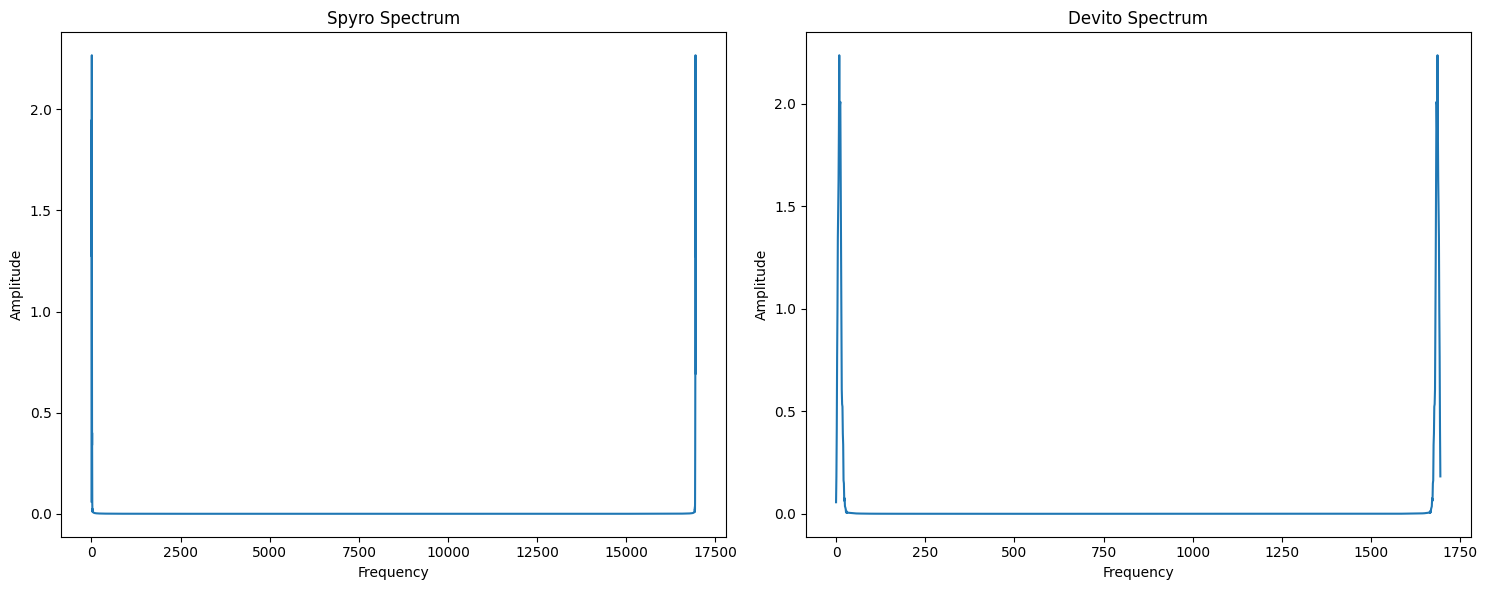

In [38]:
spyro_spectrum = np.fft.fft(rec_ex2_spyro, axis=0)
devito_spectrum = np.fft.fft(rec_ex2_devito, axis=0)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(np.abs(spyro_spectrum[:, 0]), label='Spyro')
plt.title('Spyro Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(np.abs(devito_spectrum[:, 0]), label='Devito')
plt.title('Devito Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

### 4. Correlation Analysis
A correlation of approximately 0.471 indicates a moderate positive relationship between the data from Spyro and Devito. This means that as the values from one software increase, the values from the other software also tend to increase, but not perfectly. This suggests that the results from both software have some similarities but also noticeable differences.

In [41]:
correlation = np.corrcoef(rec_ex2_spyro_reduced.flatten(), rec_ex2_devito.flatten())[0, 1]
print("Correlation between Spyro and Devito data:", correlation)

Correlation between Spyro and Devito data: 0.004201282776380735
